In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
#用于计算时间序列数据的自相关函数（ACF）和偏自相关函数（PACF）
#ACF 是时间序列数据自身的自相关性，即同一时间序列在不同时间点上的相关性，可以帮助识别时间序列中的季节性和周期性变化。
#PACF 则是去除了其它影响后（"其它影响" 指的是当前自变量以外的其它自变量在模型中的影响，也就是多重共线性的影响）的纯自相关性，
#可以帮助识别时间序列中的趋势和长期相关性。
from statsmodels.tsa.stattools import acf, pacf   
from statsmodels.tsa.arima_model import ARMA,ARIMA
register_matplotlib_converters()
from time import time
import warnings
warnings.filterwarnings('ignore')

# Catfish Sales Data

In [5]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [7]:
#read data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
catfish_sales 

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
              ...  
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Name: Total, Length: 324, dtype: int64

In [8]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))
catfish_sales

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
              ...  
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Freq: MS, Name: Total, Length: 324, dtype: int64

In [10]:
start_date = datetime(2000,1,1)
end_date = datetime(2004,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]
lim_catfish_sales 

Date
2000-01-01    25412
2000-02-01    25354
2000-03-01    29161
2000-04-01    24924
2000-05-01    24763
2000-06-01    25342
2000-07-01    24911
2000-08-01    25847
2000-09-01    23743
2000-10-01    25036
2000-11-01    21911
2000-12-01    20752
2001-01-01    24507
2001-02-01    25968
2001-03-01    28752
2001-04-01    25167
2001-05-01    24728
2001-06-01    23690
2001-07-01    24816
2001-08-01    26004
2001-09-01    24210
2001-10-01    25083
2001-11-01    21807
2001-12-01    21635
2002-01-01    27173
2002-02-01    29308
2002-03-01    28645
2002-04-01    25023
2002-05-01    27261
2002-06-01    24670
2002-07-01    26441
2002-08-01    27961
2002-09-01    26498
2002-10-01    27800
2002-11-01    23939
2002-12-01    22930
2003-01-01    27584
2003-02-01    27586
2003-03-01    30485
2003-04-01    26135
2003-05-01    27370
2003-06-01    25487
2003-07-01    26427
2003-08-01    27672
2003-09-01    26853
2003-10-01    27875
2003-11-01    23416
2003-12-01    22482
2004-01-01    27140
Freq: MS, Name:

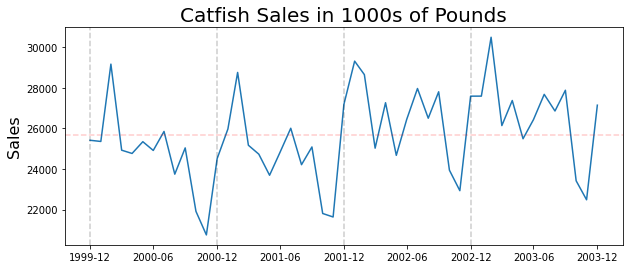

In [11]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_catfish_sales.mean(), color='r', alpha=0.2, linestyle='--')

In [12]:
first_diff = lim_catfish_sales.diff()[1:]

In [13]:
first_diff 

Date
2000-02-01     -58.0
2000-03-01    3807.0
2000-04-01   -4237.0
2000-05-01    -161.0
2000-06-01     579.0
2000-07-01    -431.0
2000-08-01     936.0
2000-09-01   -2104.0
2000-10-01    1293.0
2000-11-01   -3125.0
2000-12-01   -1159.0
2001-01-01    3755.0
2001-02-01    1461.0
2001-03-01    2784.0
2001-04-01   -3585.0
2001-05-01    -439.0
2001-06-01   -1038.0
2001-07-01    1126.0
2001-08-01    1188.0
2001-09-01   -1794.0
2001-10-01     873.0
2001-11-01   -3276.0
2001-12-01    -172.0
2002-01-01    5538.0
2002-02-01    2135.0
2002-03-01    -663.0
2002-04-01   -3622.0
2002-05-01    2238.0
2002-06-01   -2591.0
2002-07-01    1771.0
2002-08-01    1520.0
2002-09-01   -1463.0
2002-10-01    1302.0
2002-11-01   -3861.0
2002-12-01   -1009.0
2003-01-01    4654.0
2003-02-01       2.0
2003-03-01    2899.0
2003-04-01   -4350.0
2003-05-01    1235.0
2003-06-01   -1883.0
2003-07-01     940.0
2003-08-01    1245.0
2003-09-01    -819.0
2003-10-01    1022.0
2003-11-01   -4459.0
2003-12-01    -934.0
2004-01-

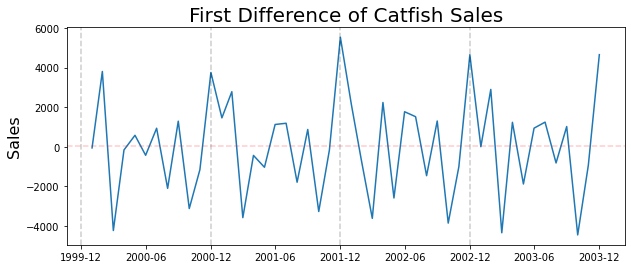

In [14]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff.mean(), color='r', alpha=0.2, linestyle='--')

# ACF

In [16]:
first_diff # 差分

Date
2000-02-01     -58.0
2000-03-01    3807.0
2000-04-01   -4237.0
2000-05-01    -161.0
2000-06-01     579.0
2000-07-01    -431.0
2000-08-01     936.0
2000-09-01   -2104.0
2000-10-01    1293.0
2000-11-01   -3125.0
2000-12-01   -1159.0
2001-01-01    3755.0
2001-02-01    1461.0
2001-03-01    2784.0
2001-04-01   -3585.0
2001-05-01    -439.0
2001-06-01   -1038.0
2001-07-01    1126.0
2001-08-01    1188.0
2001-09-01   -1794.0
2001-10-01     873.0
2001-11-01   -3276.0
2001-12-01    -172.0
2002-01-01    5538.0
2002-02-01    2135.0
2002-03-01    -663.0
2002-04-01   -3622.0
2002-05-01    2238.0
2002-06-01   -2591.0
2002-07-01    1771.0
2002-08-01    1520.0
2002-09-01   -1463.0
2002-10-01    1302.0
2002-11-01   -3861.0
2002-12-01   -1009.0
2003-01-01    4654.0
2003-02-01       2.0
2003-03-01    2899.0
2003-04-01   -4350.0
2003-05-01    1235.0
2003-06-01   -1883.0
2003-07-01     940.0
2003-08-01    1245.0
2003-09-01    -819.0
2003-10-01    1022.0
2003-11-01   -4459.0
2003-12-01    -934.0
2004-01-

<BarContainer object of 2 artists>

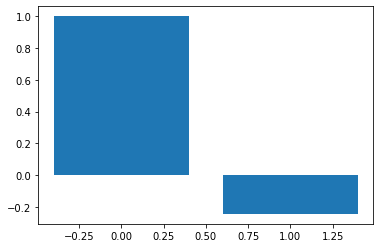

In [18]:
acf_vals = acf(first_diff)
plt.bar(range(2), acf_vals[:2])

<BarContainer object of 14 artists>

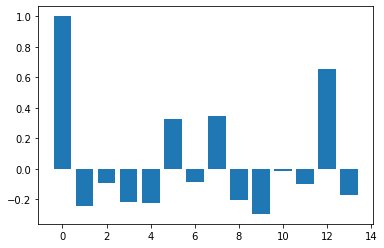

In [19]:
plt.bar(range(14), acf_vals[:14]) # 右移14月

## Based on ACF, we should start with a MA(1) process

# PACF

<BarContainer object of 14 artists>

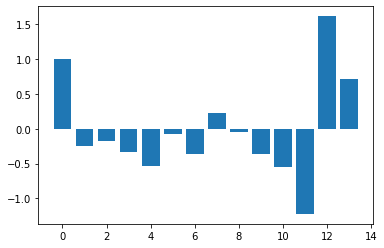

In [20]:
pacf_vals = pacf(first_diff)
plt.bar(range(14), pacf_vals[:14])

## Based on PACF, we should start with a AR(4) process

# Get training and testing sets

In [22]:
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

In [23]:
train_data

Date
2000-02-01     -58.0
2000-03-01    3807.0
2000-04-01   -4237.0
2000-05-01    -161.0
2000-06-01     579.0
2000-07-01    -431.0
2000-08-01     936.0
2000-09-01   -2104.0
2000-10-01    1293.0
2000-11-01   -3125.0
2000-12-01   -1159.0
2001-01-01    3755.0
2001-02-01    1461.0
2001-03-01    2784.0
2001-04-01   -3585.0
2001-05-01    -439.0
2001-06-01   -1038.0
2001-07-01    1126.0
2001-08-01    1188.0
2001-09-01   -1794.0
2001-10-01     873.0
2001-11-01   -3276.0
2001-12-01    -172.0
2002-01-01    5538.0
2002-02-01    2135.0
2002-03-01    -663.0
2002-04-01   -3622.0
2002-05-01    2238.0
2002-06-01   -2591.0
2002-07-01    1771.0
2002-08-01    1520.0
2002-09-01   -1463.0
2002-10-01    1302.0
2002-11-01   -3861.0
2002-12-01   -1009.0
2003-01-01    4654.0
2003-02-01       2.0
2003-03-01    2899.0
2003-04-01   -4350.0
2003-05-01    1235.0
2003-06-01   -1883.0
2003-07-01     940.0
Freq: MS, Name: Total, dtype: float64

In [24]:
test_data 

Date
2003-08-01    1245.0
2003-09-01    -819.0
2003-10-01    1022.0
2003-11-01   -4459.0
2003-12-01    -934.0
2004-01-01    4658.0
Freq: MS, Name: Total, dtype: float64

# Fit the ARMA Model

In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [47]:
# define model 
#参数包含三个数字，分别表示 AR、差分和 MA 模型的阶数
#p 表示 AR 模型中采用的滞后项数（lag order），d 表示差分次数，q 表示 MA 模型中采用的滞后项数。
model = ARIMA(train_data, order=(4,1,8))

In [48]:
#包含了该模型的各种信息，如拟合结果、残差序列等等。可以使用该对象的方法和属性来进一步分析该模型，如使用 forecast() 方法进行未来值的预测。

In [49]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.7645053863525391


In [50]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(4, 1, 8)   Log Likelihood                -363.565
Date:                Sun, 02 Apr 2023   AIC                            753.131
Time:                        20:20:17   BIC                            775.407
Sample:                    02-01-2000   HQIC                           761.242
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7834      0.271     -2.889      0.004      -1.315      -0.252
ar.L2         -0.3201      0.364     -0.879      0.379      -1.034       0.393
ar.L3         -0.7422      0.462     -1.605      0.1

## So the ARMA(4,1) model is:

## $\hat{y_t} = -0.87y_{t-1} - 0.42y_{t-2} - 0.56y_{t-3} - 0.61y_{t-4} + 0.52\varepsilon_{t-1}$

这个模型表示在时间点 $t$，预测值 $\hat{y_t}$ 是过去四个观测值（$y_{t-1}$、$y_{t-2}$、$y_{t-3}$ 和 $y_{t-4}$）以及滞后1期的误差项（$\varepsilon_{t-1}$）的线性组合。每个观测值和误差项都乘以对应的系数（$-0.87$、$-0.42$、$-0.56$、$-0.61$ 和 $0.52$）。这些系数表示每个滞后观测值和误差项对于预测时间点 $t$ 的影响程度

In [51]:
test_data

Date
2003-08-01    1245.0
2003-09-01    -819.0
2003-10-01    1022.0
2003-11-01   -4459.0
2003-12-01    -934.0
2004-01-01    4658.0
Freq: MS, Name: Total, dtype: float64

In [52]:
test_data.index[0]

Timestamp('2003-08-01 00:00:00', freq='MS')

In [53]:
test_data.index[-1]

Timestamp('2004-01-01 00:00:00', freq='MS')

In [54]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [55]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

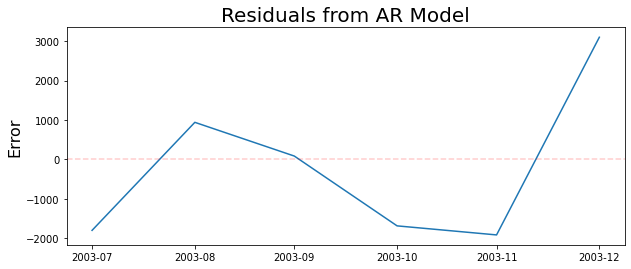

In [56]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

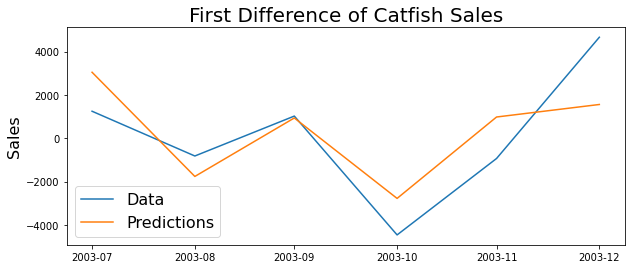

In [57]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [58]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1836.7925068017423
